In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
dataset = pd.read_csv('C:/Users/jycha/Downloads/Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [217]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [218]:
dataset.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

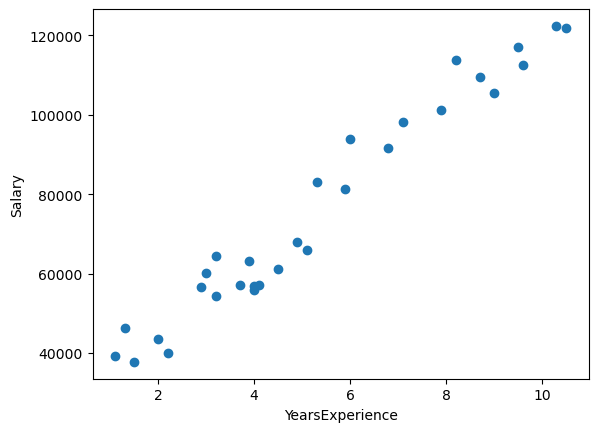

In [219]:
plt.scatter(dataset['YearsExperience'], dataset['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

plt.show()

In [220]:
y=dataset.Salary.values
x=dataset.drop('Salary',axis=1)

In [221]:
X = dataset['Salary']

y = dataset['YearsExperience']

In [222]:
X.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [223]:
y.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [224]:
X = X.to_numpy()
y = y.to_numpy()

In [225]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [226]:
X_train = X_train.reshape(-1, 1)
X_test =  X_test.reshape(-1, 1)

In [227]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test) 
y_pred

array([1.372477  , 9.85265035, 3.31071648, 3.9254439 , 9.30954262,
       8.55448065, 8.87541705, 3.18180101])

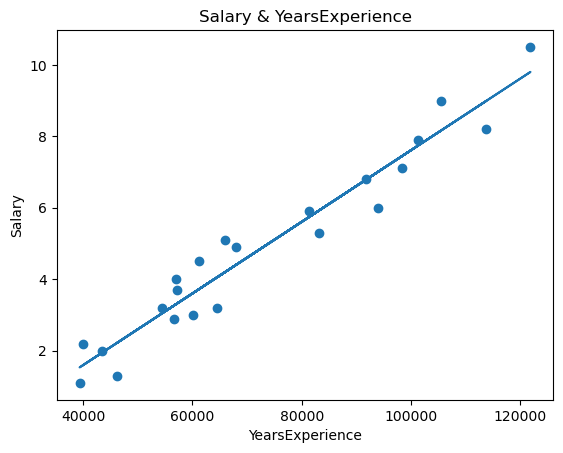

In [228]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train))
plt.title("Salary & YearsExperience")
 
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [229]:
lr.score(X_test, y_test)

0.974376290571024

In [230]:
from sklearn.metrics import mean_absolute_error

y_pred = lr.predict(X_test)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(y_test, y_pred)
print(mae)

0.40854484439547784


In [231]:
print(lr.coef_, lr.intercept_)

[0.00010017] -2.4069397347271453


In [232]:
print(lr.predict([[10]]))

[-2.40593806]


In [233]:
# MultipleRegression

In [234]:
train_poly = np.column_stack((X_train ** 2, X_train))
test_poly = np.column_stack((X_test ** 2, X_test))

In [235]:
train_poly.shape, test_poly.shape

((22, 2), (8, 2))

In [236]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, y_train)

LinearRegression()

In [237]:
print(lr.coef_, lr.intercept_)

[7.28872825e-11 8.87738670e-05] -2.006423627577629


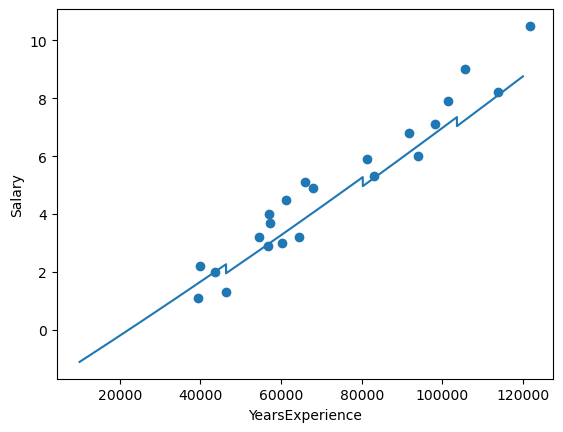

In [247]:
point = np.arange(10000, 120000)

plt.scatter(X_train, y_train)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()